In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

import seaborn as sns
sns.set_style("whitegrid")

from sklearn.preprocessing import LabelEncoder

import random
import operator

from functools import reduce


# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [3]:
dfi = pd.read_csv('../../data/LTDS/Person.csv')
dfh = pd.read_csv('../../data/LTDS/Household.csv')

C:\Users\glede\AppData\Local\Temp\ipykernel_13352\2331876740.py:1: DtypeWarning: Columns (22,38,40,107,119,122,150,151) have mixed types. Specify dtype option on import or set low_memory=False.
  dfi = pd.read_csv('../../data/LTDS/Person.csv')
C:\Users\glede\AppData\Local\Temp\ipykernel_13352\2331876740.py:2: DtypeWarning: Columns (25,32,39,52,59) have mixed types. Specify dtype option on import or set low_memory=False.
  dfh = pd.read_csv('../../data/LTDS/Household.csv')


In [34]:
dfh['phid'] = dfh['hhid']

In [35]:
df = pd.merge(dfi, dfh, on="phid", how="left")

In [36]:
to_keep = ['ppid', 'phid', 'phaboro', 'psex', 'psexi', 'page', 'pagei', 'pegroup', 'hhaboro', 'hresnon', 'hcarnan', 'hsvnan', 'hovnan', 'hincome', 'hincomei']

In [37]:
df = df[to_keep]

In [38]:
len(df)

181393

In [39]:
# Remove the imputed values
df = df[(df['psex'] == df['psexi']) & (df['page'] == df['pagei']) & (df['hincome'] == df['hincomei'])]

In [40]:
len(df)

109209

In [41]:
# Remove rows when the borough for the hh is different than from the individual
df = df[df['phaboro'] == df['hhaboro']]

In [42]:
len(df)

109023

In [43]:
# Remove hh where we don't know the number of vehicles
df = df[(df['hcarnan'] != -1) & (df['hsvnan'] != -1) & (df['hovnan'] != -1)]

In [44]:
len(df)

93806

In [45]:
df['hh_carvan'] = df['hcarnan'] + df['hsvnan'] + df['hovnan']

In [46]:
# Remove people without ethnic group
df = df[(df['pegroup'] > 0) & (df['pegroup'] < 20)]

In [47]:
to_keep = ['ppid', 'phid', 'psex', 'page', 'pegroup', 'hhaboro', 'hresnon', 'hincome', 'hh_carvan']

df = df[to_keep]

# Transform the values

In [48]:
# Transform the numerical boroughs to names
boroughs = {
    1: "Camden",
    2: "City of London",
    3: "Hackney",
    4: "Hammersmith and Fulham",
    5: "Haringey",
    6: "Islington",
    7: "Kensington and Chelsea",
    8: "Lambeth",
    9: "Lewisham",
    10: "Newham",
    11: "Southwark",
    12: "Tower Hamlets",
    13: "Wandsworth",
    14: "Westminster",
    15: "Barking and Dagenham",
    16: "Barnet",
    17: "Bexley",
    18: "Brent",
    19: "Bromley",
    20: "Croydon",
    21: "Ealing",
    22: "Enfield",
    23: "Greenwich",
    24: "Harrow",
    25: "Havering",
    26: "Hillingdon",
    27: "Hounslow",
    28: "Kingston upon Thames",
    29: "Merton",
    30: "Redbridge",
    31: "Richmond upon Thames",
    32: "Sutton",
    33: "Waltham Forest",
    34: "Dartford",
    35: "Elmbridge",
    36: "Epping Forest",
    37: "Epsom and Ewell",
    38: "Hertsmere",
    39: "Mole Valley",
    40: "Reigate and Banstead",
    41: "Runnymede",
    42: "Sevenoaks",
    43: "South Bucks",
    44: "Spelthorne",
    45: "St Albans",
    46: "Tandridge",
    47: "Three Rivers",
    48: "Thurrock",
    49: "Watford",
    50: "Woking",
}

df['hhaboro'] = df['hhaboro'].map(boroughs)

In [49]:
# Only keep the 33 boroughs
real_boroughs = ['Camden', 'City of London', 'Hackney', 'Haringey', 'Islington', 'Kensington and Chelsea', 'Lambeth', 'Lewisham', 'Newham', 'Southwark', 'Tower Hamlets', 'Wandsworth', 'Westminster', 'Barking and Dagenham', 'Barnet', 'Bexley', 'Brent', 'Bromley', 'Croydon', 'Ealing', 'Enfield', 'Greenwich', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Kingston upon Thames', 'Merton', 'Redbridge', 'Richmond upon Thames', 'Sutton', 'Waltham Forest', 'Hammersmith and Fulham']

df = df[df['hhaboro'].isin(real_boroughs)]

In [50]:
ethnic_groups = {
    17: 'White',
    18: 'White',
    1: 'White',
    2: 'White',
    3: 'White',
    4: 'Mixed',
    5: 'Mixed',
    6: 'Mixed',
    7: 'Mixed',
    8: 'Asian',
    9: 'Asian',
    10: 'Asian',
    15: 'Asian',
    11: 'Asian',
    12: 'Black',
    13: 'Black',
    14: 'Black',
    19: 'Other',
    16: 'Other'
}

df['pegroup'] = df['pegroup'].map(ethnic_groups)

In [51]:
df

,ppid,phid,psex,page,pegroup,hhaboro,hresnon,hincome,hh_carvan
8,5.002091e+08,5002091,2,36,Asian,Barking and Dagenham,5,6,2
9,5.002091e+08,5002091,1,35,Asian,Barking and Dagenham,5,6,2
10,5.002091e+08,5002091,2,9,Asian,Barking and Dagenham,5,6,2
11,5.002091e+08,5002091,2,6,Asian,Barking and Dagenham,5,6,2
12,5.002091e+08,5002091,2,0,Asian,Barking and Dagenham,5,6,2
...,...,...,...,...,...,...,...,...,...
181382,9.850122e+09,98501222,2,23,White,Wandsworth,1,4,0
181383,9.850512e+09,98505121,2,70,Asian,Wandsworth,1,2,0
181384,9.850513e+09,98505131,2,54,Mixed,Wandsworth,1,2,1
181385,9.850520e+09,98505201,2,60,Black,Wandsworth,2,3,1


In [52]:
income = {
    1: '0-5k',
    2: '05-10k',
    3: '10-15k',
    4: '15-20k',
    5: '20-25k',
    6: '25-35k',
    7: '35-50k',
    8: '50-75k',
    9: '75-100k',
    10: '+100k'
}

df['hincome'] = df['hincome'].map(income)

In [53]:
gender = {
    1: 'male',
    2: 'female'
}

df['psex'] = df['psex'].map(gender)

In [54]:
df

,ppid,phid,psex,page,pegroup,hhaboro,hresnon,hincome,hh_carvan
8,5.002091e+08,5002091,female,36,Asian,Barking and Dagenham,5,25-35k,2
9,5.002091e+08,5002091,male,35,Asian,Barking and Dagenham,5,25-35k,2
10,5.002091e+08,5002091,female,9,Asian,Barking and Dagenham,5,25-35k,2
11,5.002091e+08,5002091,female,6,Asian,Barking and Dagenham,5,25-35k,2
12,5.002091e+08,5002091,female,0,Asian,Barking and Dagenham,5,25-35k,2
...,...,...,...,...,...,...,...,...,...
181382,9.850122e+09,98501222,female,23,White,Wandsworth,1,15-20k,0
181383,9.850512e+09,98505121,female,70,Asian,Wandsworth,1,05-10k,0
181384,9.850513e+09,98505131,female,54,Mixed,Wandsworth,1,05-10k,1
181385,9.850520e+09,98505201,female,60,Black,Wandsworth,2,10-15k,1


In [55]:
comp = []

for hid in df['phid'].unique():

    rows = df[df['phid'] == hid]

    if len(rows) == 1:
        comp.append('Single')
    else:

        adults = rows[rows['page'] >= 18]

        if len(adults) == 0:
            for i in range(len(rows)):
                comp.append('Other')
        elif len(adults) == 1:
            for i in range(len(rows)):
                comp.append('Lone parent')
        else:

            ages = list(rows['page'])
            ages.sort(reverse=True)

            # If the difference between the oldest and second-oldest adult is bigger than 16 => it's a lone parent
            if ages[0]-ages[1] >= 16:
                for i in range(len(rows)):
                    comp.append('Lone parent')
            else:
                # If there are 2 adults with close age => it's a couple without kids
                if len(adults) == 2:
                    for i in range(len(rows)):
                        comp.append('Couple family')
                else:
                    # We suppose that it's either a couple with kids or something else.
                    # Thus, both parents should be older to the first kid by at least 16 yo
                    if ages[1]-ages[2] >= 16:
                        for i in range(len(rows)):
                            comp.append('Couple family')
                    else:
                        # Most likely multiple adults in a same household
                        for i in range(len(rows)):
                            comp.append('Other')

In [56]:
df['hh_comp'] = comp

In [57]:
df = df.rename(columns={'psex': 'gender', 'page': 'age', 'pegroup': 'ethnicity', 'hhaboro': 'hh_borough', 'hresnon': 'hh_people', 'hincome': 'hh_income'})

In [58]:
df.index = range(len(df))

In [59]:
df.to_csv('../../data/LTDS/cleaned_id.csv', index=False)

In [60]:
df.drop(['ppid', 'phid'], axis=1, inplace=True)

In [61]:
df.to_csv('../../data/LTDS/cleaned.csv', index=False)

# Change from boroughs to regions

In [8]:
df = pd.read_csv('../../data/LTDS/cleaned.csv')

In [9]:
regions = {
    'Central London': ['City of London', 'Camden', 'Kensington and Chelsea', 'Islington', 'Westminster', 'Southwark', 'Lambeth'],
    'South London': ['Bromley', 'Croydon', 'Kingston upon Thames', 'Merton', 'Sutton', 'Wandsworth'],
    'East London': ['Barking and Dagenham', 'Bexley', 'Greenwich', 'Hackney', 'Havering', 'Lewisham', 'Newham', 'Tower Hamlets', 'Waltham Forest'],
    'North London': ['Barnet', 'Enfield', 'Haringey'],
    'West London': ['Brent', 'Ealing', 'Hammersmith & Fulham', 'Harrow', 'Hillingdon', 'Hounslow', 'Redbridge', 'Richmond upon Thames']
}

rr = {}
for k in regions.keys():
    for v in regions[k]:
        rr[v] = k

In [10]:
df['hh_region'] = df['hh_borough'].map(rr)

In [11]:
df.drop(['hh_borough'], axis=1, inplace=True)

In [12]:
df.to_csv('../../data/LTDS/cleaned_region.csv', index=False)

# Select specific boroughs

In [3]:
df = pd.read_csv('../../data/LTDS/cleaned.csv')

In [4]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [5]:
df = df[df['hh_borough'].isin(boroughs)]

In [6]:
df.to_csv('../../data/LTDS/cleaned_select.csv', index=False)

# Bias data

In [4]:
df = pd.read_csv('../../data/LTDS/cleaned_select.csv')

In [12]:
idx_to_remove = []
for b in df.hh_borough.unique():
    proba = np.random.random()

    tmp = df[df['hh_borough'] == b]

    type_ = np.random.randint(1, 5)

    perc = 0.8
        
    print(b, type_)

    if type_ == 1:

        gender = 'female' if np.random.random() <= 0.5 else 'male'

        idx = list(tmp[(tmp['gender'] == gender)].index)

    elif type_ == 2:
        idx = list(tmp[(tmp['age'] <= 20)].index)
    elif type_ == 3:
        idx = list(tmp[(tmp['age'] > 20) & (df['age'] < 50)].index)
    else:
        idx = list(tmp[(tmp['age'] >= 50)].index)

    idx_to_remove.append(random.sample(idx, int(len(idx)*perc)))

out = reduce(operator.concat, idx_to_remove)
biased_df = df.drop(out)
biased_df.index = range(len(biased_df))

Barnet 4
Brent 2
Bromley 2
City of London 2
Enfield 2
Greenwich 2
Havering 2
Hillingdon 2
Kingston upon Thames 2
Westminster 2


In [15]:
len(biased_df)

19420

In [19]:
biased_df.to_csv('../../data/LTDS/cleaned_bias.csv', index=False)

# Del data

In [2]:
df = pd.read_csv('../../data/LTDS/cleaned_select.csv')

In [3]:
len(df.columns)

8

In [4]:
len(df)

29158

In [9]:
idx_to_remove = []
for b in df.hh_borough.unique():

    tmp = df[df['hh_borough'] == b]

    type_ = np.random.randint(1, 5)

    if type_ == 1:
        idx = list(tmp[~(tmp['age'] <= 25)].index)
    elif type_ == 2:
        idx = list(tmp[~((tmp['age'] > 25) & (df['age'] < 55))].index)
    else:
        idx = list(tmp[~(tmp['age'] >= 55)].index)

    idx_to_remove.append(random.sample(idx, int(len(idx)*0.95)))

out = reduce(operator.concat, idx_to_remove)
biased_df = df.drop(out)
biased_df.index = range(len(biased_df))

C:\Users\glede\AppData\Local\Temp\ipykernel_22924\2136040398.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = list(tmp[~((tmp['age'] > 25) & (df['age'] < 55))].index)
C:\Users\glede\AppData\Local\Temp\ipykernel_22924\2136040398.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = list(tmp[~((tmp['age'] > 25) & (df['age'] < 55))].index)


In [10]:
len(biased_df)

10009

<AxesSubplot:>

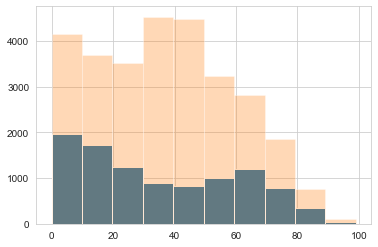

In [11]:
biased_df.age.hist()
df.age.hist(alpha=0.3)

In [12]:
biased_df.to_csv('../../data/LTDS/cleaned_del.csv', index=False)

# Check data

In [9]:
df = biased_df

In [20]:
df = df.sample(int(0.1*len(df)))

In [3]:
num_data = {}

le = LabelEncoder()

for c in df.columns:
    if df[c].dtype == 'object':
        num_data[c] = le.fit_transform(df[c])
    else:
        num_data[c] = df[c]

In [4]:
df_num = pd.DataFrame(num_data)

In [18]:
matrix = df_num.corr('spearman')

In [19]:
for i, n in enumerate(matrix.columns):
    for j, m in enumerate(matrix.columns):
        print('{} {} {:.2f}'.format(j, i, matrix[m].loc[n]))
    print()

0 0 1.00
1 0 -0.02
2 0 0.01
3 0 -0.00
4 0 0.02
5 0 0.03
6 0 0.04
7 0 -0.06

0 1 -0.02
1 1 1.00
2 1 0.17
3 1 0.03
4 1 -0.48
5 1 -0.05
6 1 -0.03
7 1 0.08

0 2 0.01
1 2 0.17
2 2 1.00
3 2 0.15
4 2 -0.24
5 2 0.06
6 2 0.08
7 2 -0.04

0 3 -0.00
1 3 0.03
2 3 0.15
3 3 1.00
4 3 -0.08
5 3 0.04
6 3 0.00
7 3 -0.01

0 4 0.02
1 4 -0.48
2 4 -0.24
3 4 -0.08
4 4 1.00
5 4 0.11
6 4 0.31
7 4 -0.37

0 5 0.03
1 5 -0.05
2 5 0.06
3 5 0.04
4 5 0.11
5 5 1.00
6 5 0.30
7 5 -0.25

0 6 0.04
1 6 -0.03
2 6 0.08
3 6 0.00
4 6 0.31
5 6 0.30
6 6 1.00
7 6 -0.35

0 7 -0.06
1 7 0.08
2 7 -0.04
3 7 -0.01
4 7 -0.37
5 7 -0.25
6 7 -0.35
7 7 1.00



In [20]:
matrix

,gender,age,ethnicity,hh_borough,hh_people,hh_income,hh_carvan,hh_comp
gender,1.000000,-0.019507,0.012176,-0.000828,0.017551,0.032416,0.040203,-0.056317
age,-0.019507,1.000000,0.169354,0.028027,-0.484659,-0.054417,-0.025299,0.081458
ethnicity,0.012176,0.169354,1.000000,0.149751,-0.236416,0.062135,0.077987,-0.038931
hh_borough,-0.000828,0.028027,0.149751,1.000000,-0.080935,0.041878,0.001272,-0.009586
hh_people,0.017551,-0.484659,-0.236416,-0.080935,1.000000,0.114675,0.308690,-0.365750
hh_income,0.032416,-0.054417,0.062135,0.041878,0.114675,1.000000,0.300904,-0.250590
hh_carvan,0.040203,-0.025299,0.077987,0.001272,0.308690,0.300904,1.000000,-0.350512
hh_comp,-0.056317,0.081458,-0.038931,-0.009586,-0.365750,-0.250590,-0.350512,1.000000


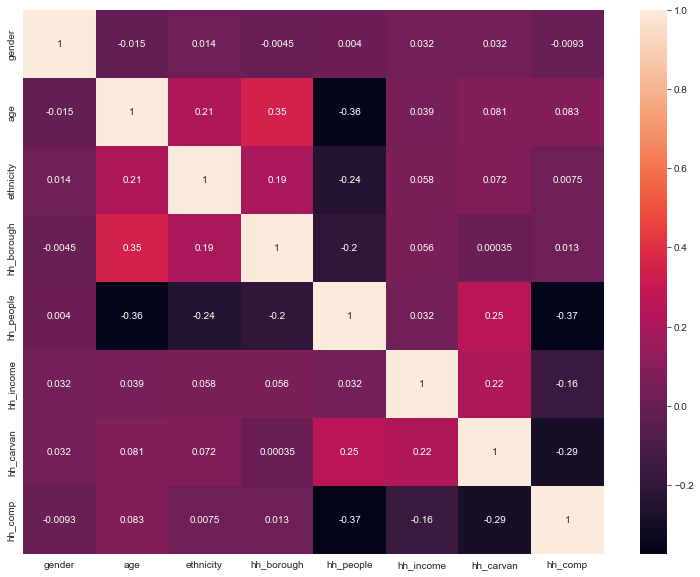

In [13]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix, annot=True)
plt.show()

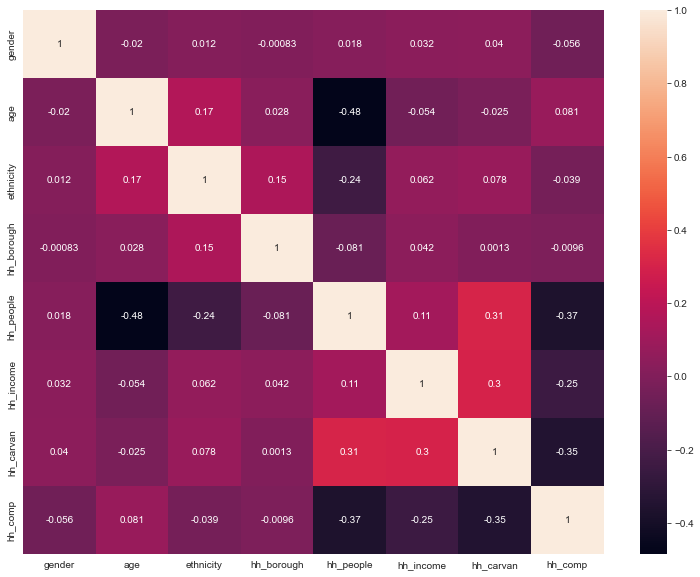

In [21]:
plt.figure(figsize=(13,10))
sns.heatmap(matrix, annot=True)
plt.show()